In [42]:
import os
os.environ['KAGGLE_USERNAME'] = 'whitecapp'
os.environ['KAGGLE_KEY'] = 'fa7b0087a8cbf02fbdbff343c27306fe'

!kaggle datasets download -d rsadiq/salary
!unzip /content/salary.zip

Dataset URL: https://www.kaggle.com/datasets/rsadiq/salary
License(s): unknown
salary.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/salary.zip
replace Salary.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Salary.csv              


In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Salary.csv')
df.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


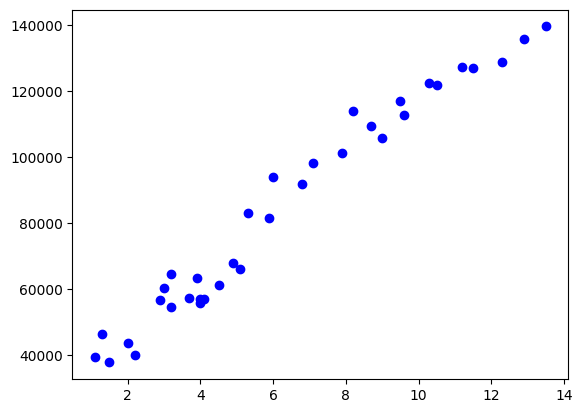

In [44]:
plt.plot(df['YearsExperience'],df['Salary'],'bo')
plt.show()

In [45]:
x_data = torch.tensor(df['YearsExperience'], dtype=torch.float32)

In [46]:
x_data = x_data.view(-1,1)

In [47]:
y_data = torch.tensor(df['Salary'], dtype=torch.float32).view(-1,1)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

torch.Size([28, 1]) torch.Size([7, 1])
torch.Size([28, 1]) torch.Size([7, 1])


In [49]:
model = nn.Linear(1,1)

In [64]:
optimizer = torch.optim.Adam(model.parameters(), lr=2000)
costlist = []
for epoch in range(10001):
  y_pred = model(x_train)
  cost = F.mse_loss(y_pred, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  costlist.append(cost.item())
  if epoch % 1000 == 0:
    print(f'Epoch: {epoch}, Cost: {cost.item()}')

Epoch: 0, Cost: 37462108.0
Epoch: 1000, Cost: 37462112.0
Epoch: 2000, Cost: 37462128.0
Epoch: 3000, Cost: 37464336.0
Epoch: 4000, Cost: 37462112.0
Epoch: 5000, Cost: 37462116.0
Epoch: 6000, Cost: 39586324.0
Epoch: 7000, Cost: 37462184.0
Epoch: 8000, Cost: 37462404.0
Epoch: 9000, Cost: 37467596.0
Epoch: 10000, Cost: 37474392.0


In [65]:
new_pred_y = model(x_test)

new_pred_y

tensor([[ 88980.1328],
        [120838.3281],
        [ 72620.5234],
        [ 69176.3906],
        [ 64871.2266],
        [ 62288.1328],
        [ 64010.1953]], grad_fn=<AddmmBackward0>)

In [66]:
y_test

tensor([[ 91738.],
        [121872.],
        [ 67938.],
        [ 61111.],
        [ 55794.],
        [ 57189.],
        [ 63218.]])

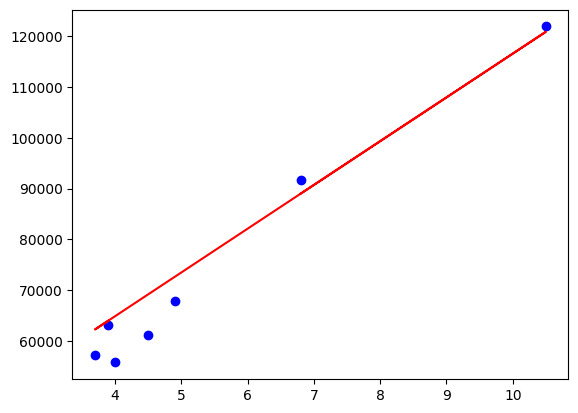

In [67]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, new_pred_y.detach().numpy(), color='red')
plt.show()

In [68]:
print(list(model.parameters()))

[Parameter containing:
tensor([[8610.3232]], requires_grad=True), Parameter containing:
tensor([30429.9355], requires_grad=True)]
